In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import statistics
import numpy as np

In [2]:
def compute_stats(data):
    return [
        f"{min(data):.2f}",
        f"{max(data):.2f}",
        f"{statistics.mean(data):.2f}",
        f"{statistics.median(data):.2f}",
        f"{statistics.stdev(data):.2f}"
    ]

In [3]:
directory = "../asset"
original_sizes = []
encoded_sizes = []
compression_ratios = []
m = 0.5

In [4]:
image_filenames = [filename for filename in os.listdir(directory) if filename.endswith(".jpg")]
print(f"total images: {len(image_filenames)}")
increment = len(image_filenames) / 10
for idx, filename in enumerate(image_filenames):
    if idx % int(increment) == 0:
        percent = idx / len(image_filenames) * 100
        print(f"{percent:.0f}%")
    image_path = os.path.join(directory, filename)
    img = cv2.imread(image_path)
    if img is not None:
        compressed = cv2.resize(img, None, fx=m, fy=m, interpolation=cv2.INTER_NEAREST)
        original_size = img.nbytes / 1024
        compressed_size = compressed.nbytes / 1024
        compression_ratio = compressed_size / original_size
        original_sizes.append(original_size)
        encoded_sizes.append(compressed_size)
        compression_ratios.append(compression_ratio)

total images: 757
0%
10%
20%
30%
40%
50%
59%
69%
79%
89%
99%


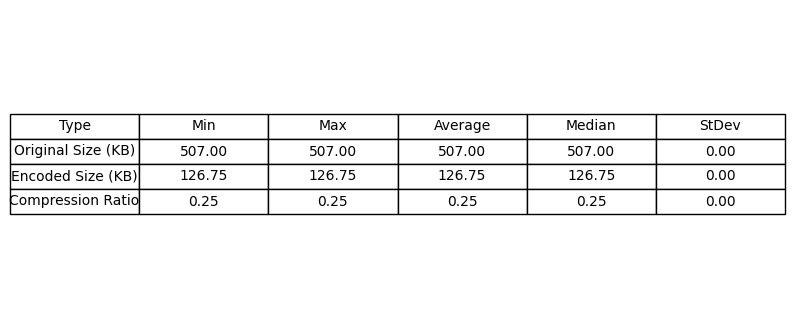

In [5]:
stats = {
    "Original Size (KB)": compute_stats(original_sizes),
    "Encoded Size (KB)": compute_stats(encoded_sizes),
    "Compression Ratio": compute_stats(compression_ratios)
}
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')
column_labels = ["Type", "Min", "Max", "Average", "Median", "StDev"]
table_data = [[key] + value for key, value in stats.items()]
table = ax.table(cellText=table_data, colLabels=column_labels, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
plt.show()